In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [42]:
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)

print("Checking Nulls \n",df.isnull().sum())
print("Data is Clean.")
df.describe()

Checking Nulls 
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Data is Clean.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
X = data.data
Y = data.target
SS = StandardScaler()
SS.fit(X)
X = SS.transform(X)

In [47]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.8,random_state=12)

In [50]:
#Defining The Algorithms
LogReg = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=3)
DecTree = DecisionTreeClassifier(max_depth=11)
#Fitting The Data
LogReg.fit(x_train,y_train)
KNN.fit(x_train,y_train)
DecTree.fit(x_train,y_train)
#predicting test set
y_pred_log = LogReg.predict(x_test)
y_pred_knn = KNN.predict(x_test)
y_pred_dec = DecTree.predict(x_test)


In [51]:
print("Logistic Regression Metrics: ")
print(f"Accuracy : {accuracy_score(y_pred_log,y_test)}")
print(f"precision : {precision_score(y_pred_log,y_test,average='weighted')}")
print(f"Recall : {recall_score(y_pred_log,y_test,average='weighted')}")
print(f"F1 Score : {f1_score(y_pred_log,y_test,average='weighted')}")


print("KNN Metrics: ")
print(f"Accuracy : {accuracy_score(y_pred_knn,y_test,)}")
print(f"precision : {precision_score(y_pred_knn,y_test,average='weighted')}")
print(f"Recall : {recall_score(y_pred_knn,y_test,average='weighted')}")
print(f"F1 Score : {f1_score(y_pred_knn,y_test,average='weighted')}")

print("DecisionTree Metrics: ")
print(f"Accuracy : {accuracy_score(y_pred_dec,y_test)}")
print(f"precision : {precision_score(y_pred_dec,y_test,average='weighted')}")
print(f"Recall : {recall_score(y_pred_dec,y_test,average='weighted')}")
print(f"F1 Score : {f1_score(y_pred_dec,y_test,average='weighted')}")

Logistic Regression Metrics: 
Accuracy : 0.9666666666666667
precision : 0.9703703703703703
Recall : 0.9666666666666667
F1 Score : 0.9667698658410733
KNN Metrics: 
Accuracy : 0.9333333333333333
precision : 0.9361111111111111
Recall : 0.9333333333333333
F1 Score : 0.9331807780320366
DecisionTree Metrics: 
Accuracy : 0.9333333333333333
precision : 0.9481481481481481
Recall : 0.9333333333333333
F1 Score : 0.9341666666666666


Confusion Matrix of Logisitc Regression :


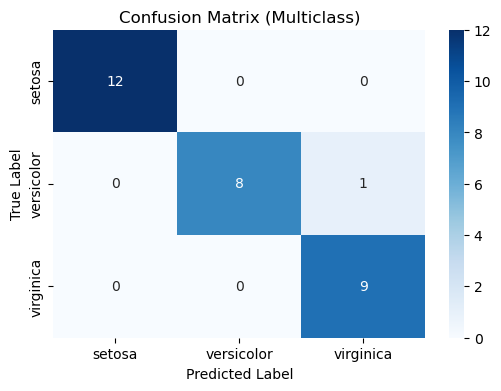

In [60]:
print("Confusion Matrix of Logisitc Regression :")
cm1 = confusion_matrix(y_test,y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Multiclass)")
plt.show()

Confusion Matrix of KNN :


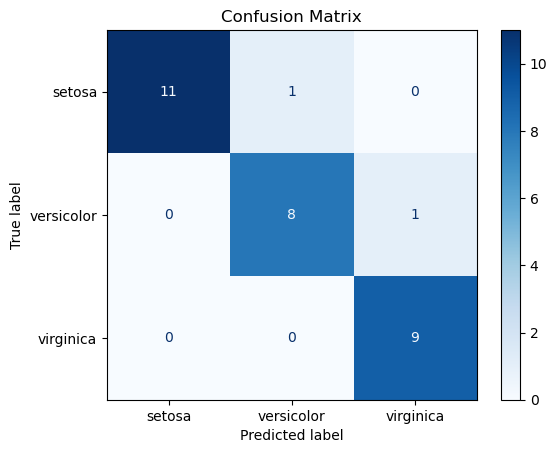

In [59]:
print("Confusion Matrix of KNN :")

cm2 = confusion_matrix(y_test,y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix of Decision Tree :


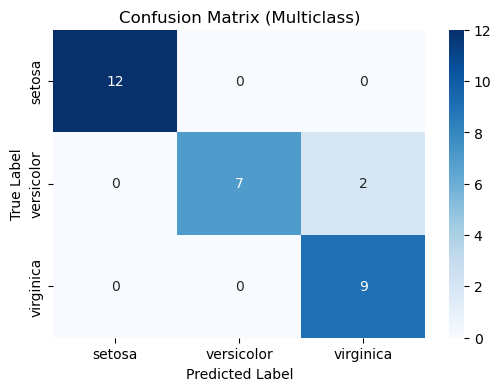

In [61]:
print("Confusion Matrix of Decision Tree :")
cm3 = confusion_matrix(y_test,y_pred_dec)

plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Multiclass)")
plt.show()